In [1]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv('D:/ESAA/21-1/costarica/train.csv')
test = pd.read_csv('D:/ESAA/21-1/costarica/test.csv')

In [3]:
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


- __Id__ - a unique identifier for each row.
- __Target__ - the target is an ordinal variable indicating groups of income levels.
    - 1 = extreme poverty
    - 2 = moderate poverty
    - 3 = vulnerable households
    - 4 = non vulnerable households
- __idhogar__ - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
- __parentesco1__ - indicates if this person is the head of the household.

- __v2a1__, Monthly __rent payment__
- hacdor, =1 Overcrowding by bedrooms
- __rooms__,  __number of all rooms__ in the house
- hacapo, =1 Overcrowding by rooms
- v14a, =1 has bathroom in the household
- refrig, =1 if the household has refrigerator
- v18q, owns a tablet
- v18q1, number of tablets household owns
- r4h1, Males younger than 12 years of age
- r4h2, Males 12 years of age and older
- __r4h3__, __Total males__ in the household
- r4m1, Females younger than 12 years of age
- r4m2, Females 12 years of age and older
- __r4m3__, __Total females__ in the household
- r4t1, persons younger than 12 years of age
- r4t2, persons 12 years of age and older
- __r4t3__, __Total persons__ in the household
- __tamhog__, __size__ of the household
- __tamviv__, __number of persons__ living in the household
- escolari, years of schooling
- rez_esc, Years behind in school
- hhsize, household size
- paredblolad, =1 if predominant material on the outside wall is block or brick
- paredzocalo, =1 if predominant material on the outside wall is socket (wood, zinc or absbesto
- paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
- pareddes, =1 if predominant material on the outside wall is waste material
- paredmad, =1 if predominant material on the outside wall is wood
- paredzinc, =1 if predominant material on the outside wall is zink
- paredfibras, =1 if predominant material on the outside wall is natural fibers
- paredother, =1 if predominant material on the outside wall is other
- pisomoscer, =1 if predominant material on the floor is mosaic,  ceramic,  terrazo
- pisocemento, =1 if predominant material on the floor is cement
- pisoother, =1 if predominant material on the floor is other
- pisonatur, =1 if predominant material on the floor is  natural material
- pisonotiene, =1 if no floor at the household
- pisomadera, =1 if predominant material on the floor is wood
- techozinc, =1 if predominant material on the roof is metal foil or zink
- techoentrepiso, =1 if predominant material on the roof is fiber cement,  mezzanine 
- techocane, =1 if predominant material on the roof is natural fibers
- techootro, =1 if predominant material on the roof is other
- cielorazo, =1 if the house has ceiling
- abastaguadentro, =1 if water provision inside the dwelling
- abastaguafuera, =1 if water provision outside the dwelling
- abastaguano, =1 if no water provision
- public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
- planpri, =1 electricity from private plant
- noelec, =1 no electricity in the dwelling
- coopele, =1 electricity from cooperative
- sanitario1, =1 no toilet in the dwelling
- sanitario2, =1 toilet connected to sewer or cesspool
- sanitario3, =1 toilet connected to  septic tank
- sanitario5, =1 toilet connected to black hole or letrine
- sanitario6, =1 toilet connected to other system
- energcocinar1, =1 no main source of energy used for cooking (no kitchen)
- energcocinar2, =1 main source of energy used for cooking electricity
- energcocinar3, =1 main source of energy used for cooking gas
- energcocinar4, =1 main source of energy used for cooking wood charcoal
- elimbasu1, =1 if rubbish disposal mainly by tanker truck
- elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
- elimbasu3, =1 if rubbish disposal mainly by burning
- elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
- elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
- elimbasu6, =1 if rubbish disposal mainly other
- epared1, =1 if walls are bad
- epared2, =1 if walls are regular
- epared3, =1 if walls are good
- etecho1, =1 if roof are bad
- etecho2, =1 if roof are regular
- etecho3, =1 if roof are good
- eviv1, =1 if floor are bad
- eviv2, =1 if floor are regular
- eviv3, =1 if floor are good
- dis, =1 if disable person
- male, =1 if male
- female, =1 if female
- estadocivil1, =1 if less than 10 years old
- estadocivil2, =1 if free or coupled uunion
- estadocivil3, =1 if married
- estadocivil4, =1 if divorced
- estadocivil5, =1 if separated
- estadocivil6, =1 if widow/er
- estadocivil7, =1 if single
- parentesco1, =1 if household head
- parentesco2, =1 if spouse/partner
- parentesco3, =1 if son/doughter
- parentesco4, =1 if stepson/doughter
- parentesco5, =1 if son/doughter in law
- parentesco6, =1 if grandson/doughter
- parentesco7, =1 if mother/father
- parentesco8, =1 if father/mother in law
- parentesco9, =1 if brother/sister
- parentesco10, =1 if brother/sister in law
- parentesco11, =1 if other family member
- parentesco12, =1 if other non family member
- __idhogar__, __Household level identifier__
- hogar_nin, Number of children 0 to 19 in household
- hogar_adul, Number of adults in household
- hogar_mayor, # of individuals 65+ in the household
- hogar_total, # of total individuals in the household
- dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- __edjefe__, __years of education of male head__ of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- __edjefa__, __years of education of female head__ of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- meaneduc,average years of education for adults (18+)
- instlevel1, =1 no level of education
- instlevel2, =1 incomplete primary
- instlevel3, =1 complete primary
- instlevel4, =1 incomplete academic secondary level
- instlevel5, =1 complete academic secondary level
- instlevel6, =1 incomplete technical secondary level
- instlevel7, =1 complete technical secondary level
- instlevel8, =1 undergraduate and higher education
- instlevel9, =1 postgraduate higher education
- __bedrooms__, number of __bedrooms__
- overcrowding, # persons per room
- tipovivi1, =1 own and fully paid house
- tipovivi2, =1 own,  paying in installments
- tipovivi3, =1 rented
- tipovivi4, =1 precarious
- tipovivi5, "=1 other(assigned,  borrowed)"
- computer, =1 if the household has notebook or desktop computer
- television, =1 if the household has TV
- mobilephone, =1 if mobile phone
- __qmobilephone, # of mobile phones__
- lugar1, =1 region Central
- lugar2, =1 region Chorotega
- lugar3, =1 region PacÃƒÂ­fico central
- lugar4, =1 region Brunca
- lugar5, =1 region Huetar AtlÃƒÂ¡ntica
- lugar6, =1 region Huetar Norte
- area1, =1 zona urbana
- area2, =2 zona rural
- age, Age in years
- SQBescolari, escolari squared
- SQBage, age squared
- SQBhogar_total, hogar_total squared
- SQBedjefe, edjefe squared
- SQBhogar_nin, hogar_nin squared
- SQBovercrowding, overcrowding squared
- SQBdependency, dependency squared
- SQBmeaned, square of the mean years of education of adults (>=18) in the household
- agesq, Age squared

In [4]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import f1_score
#from sklearn.externals.joblib import Parallel, delayed
from sklearn.base import clone
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings("ignore")

In [83]:
from sklearn.preprocessing import LabelEncoder

def encode_data(df):
    df["idhogar"]=LabelEncoder().fit_transform(df["idhogar"])
    
def feature_importance(forest, X_train, display_results=True):
    ranked_list=[]
    zero_features=[]
    importances=forest.feature_importances_
    indicies=np.argsort(importances)[::-1]
    
    if display_results:
        print("Feature ranking:")
        
    for f in range(X_train.shape[1]):
        if display_results:
            print("%d. feature %d (%f)"%(f+1, indicies[f], importances[indicies[f]])
                 +"-"+X_train.columns[indicies[f]])
        ranked_list.append(X_train.columns[indicies[f]])
        
        if importances[indicies[f]]==0.0:
            zero_features.append(X_train.columns[indicies[f]])
    return ranked_list, zero_features
            

In [6]:
def do_features(df):
    feats_div=[('children_fraction', 'r4t1', 'r4t3'),
                ('working_man_fraction', 'r4h2', 'r4t3'),
                ('all_man_fraction', 'r4h3', 'r4t3'),
                ('human_density', 'tamviv', 'rooms'),
                ('human_bed_density', 'tamviv', 'bedrooms'),
                ('rent_per_person', 'v2a1', 'r4t3'),
                ('rent_per_room', 'v2a1', 'rooms'),
                ('mobile_density', 'qmobilephone', 'r4t3'),
                ('tablet_density', 'v18q1', 'r4t3'),
                ('mobile_adult_density', 'qmobilephone', 'r4t2'),
                ('tablet_adult_density', 'v18q1', 'r4t2')
               ]
    feats_sub=[('people_not_living', 'tamhog', 'tamviv'),
               ('people_weird_stat', 'tamhog', 'r4t3')
              ]
    for f_new, f1, f2 in feats_div:
        df["fe_"+f_new]=(df[f1]/df[f2]).astype(np.float32)
    for f_new, f1, f2 in feats_sub:
        df["fe_"+f_new]=(df[f1]-df[f2]).astype(np.float32)
    
    aggs_num={"age":["min","max","mean"],
              "escolari":["min","max","mean"]
             }
    aggs_cat={"dis":["mean"]}
    
    for s_ in ["estadocivil","parentesco","instlevel"]:
        for f_ in [f_ for f_ in df.columns if f_.startswith(s_)]:
            aggs_cat[f_]=["mean","count"]
        
    for name_, df_ in [("18",df.query("age>=18"))]:
        df_agg=df_.groupby("idhogar").agg({**aggs_num,**aggs_cat}).astype(np.float32)
        df_agg.columns=pd.Index(["agg"+name_+"_"+e[0]+"_"+e[1].upper() for e in df_agg.columns.tolist()])
        df=df.join(df_agg, how="left", on="idhogar")
        del df_agg
        
    df.drop(["Id"], axis=1, inplace=True)
    return df


In [7]:
def convert_OHE2LE(df):
    tmp_df=df.copy(deep=True)
    for s_ in ['pared', 'piso', 'techo', 'abastagua', 'sanitario', 'energcocinar',
               'elimbasu', 'epared', 'etecho', 'eviv', 'estadocivil', 'parentesco',
               'instlevel', 'lugar', 'tipovivi', 'manual_elec']:
        if "manual_" not in s_:
            cols_s_=[f_ for f_ in df.columns if f_.startswith(s_)]
        elif "elec" in s_:
            cols_s_=["public","planpri","noelec","coopele"]
        sum_ohe=tmp_df[cols_s_].sum(axis=1).unique()
        if 0 in sum_ohe:
            print("The OHE in {} is incomplete. A new column will be added before label encoding".format(s_))
            col_dummy=s_+"_dummy"
            tmp_df[col_dummy]=(tmp_df[cols_s_].sum(axis=1)==0).astype(np.int8)
            #0이면 True=1, 1이면 False=0
            cols_s_.append(col_dummy)
            sum_ohe=tmp_df[cols_s_].sum(axis=1).unique()
            if 0 in sum_ohe:
                print("The category completion did not work")
        tmp_cat=tmp_df[cols_s_].idxmax(axis=1)
        tmp_df[s_+"_LE"]=LabelEncoder().fit_transform(tmp_cat).astype(np.int16)
        if "parentesco1" in cols_s_:
            cols_s_.remove("parentesco1")
        tmp_df.drop(cols_s_, axis=1, inplace=True)
    return tmp_df

In [8]:
test_ids = test.Id

In [9]:
def process_df(df_):
    encode_data(df_)
    return do_features(df_)

train=process_df(train)
test=process_df(test)

In [10]:
train['dependency'] = np.sqrt(train['SQBdependency'])
test['dependency'] = np.sqrt(test['SQBdependency'])

#edjefa=years of education of female head
#edjefe=years of education of male head 
#escolari=years of schooling

# education=no -> edjefa=0
train.loc[train['edjefa'] == "no", "edjefa"] = 0
train.loc[train['edjefe'] == "no", "edjefe"] = 0
test.loc[test['edjefa'] == "no", "edjefa"] = 0
test.loc[test['edjefe'] == "no", "edjefe"] = 0

# education=yes & household head -> edjefa=escolari(공부한 기간)
train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "edjefa"] = train.loc[(train['edjefa'] == "yes") & (train['parentesco1'] == 1), "escolari"]
train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "edjefe"] = train.loc[(train['edjefe'] == "yes") & (train['parentesco1'] == 1), "escolari"]
test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "edjefa"] = test.loc[(test['edjefa'] == "yes") & (test['parentesco1'] == 1), "escolari"]
test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "edjefe"] = test.loc[(test['edjefe'] == "yes") & (test['parentesco1'] == 1), "escolari"]

# education=yes 지만 household head 여부 모르면 -> edjefa=4
train.loc[train['edjefa'] == "yes", "edjefa"] = 4
train.loc[train['edjefe'] == "yes", "edjefe"] = 4
test.loc[test['edjefa'] == "yes", "edjefa"] = 4
test.loc[test['edjefe'] == "yes", "edjefe"] = 4

# convert to int 
train['edjefe'] = train['edjefe'].astype("int")
train['edjefa'] = train['edjefa'].astype("int")
test['edjefe'] = test['edjefe'].astype("int")
test['edjefa'] = test['edjefa'].astype("int")

# household head의 최대 education 기간으로 edjef 만듦
train['edjef'] = np.max(train[['edjefa','edjefe']], axis=1)
test['edjef'] = np.max(test[['edjefa','edjefe']], axis=1)

# na 처리
train['v2a1']=train['v2a1'].fillna(0)
test['v2a1']=test['v2a1'].fillna(0)

test['v18q1']=test['v18q1'].fillna(0)
train['v18q1']=train['v18q1'].fillna(0)

train['rez_esc']=train['rez_esc'].fillna(0)
test['rez_esc']=test['rez_esc'].fillna(0)

train.loc[train.meaneduc.isnull(), "meaneduc"] = 0
train.loc[train.SQBmeaned.isnull(), "SQBmeaned"] = 0

test.loc[test.meaneduc.isnull(), "meaneduc"] = 0
test.loc[test.SQBmeaned.isnull(), "SQBmeaned"] = 0

# 화장실이 있는데 없다고 되어있는 경우
# v14a=1: bathroom 있음
# sanitario1=1: toilet 없음
# abastaguano=0: water 있음

# bathroom은 있는데 toilet이 없는 경우엔 둘다 없는걸로
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "v14a"] = 0
train.loc[(train.v14a ==  1) & (train.sanitario1 ==  1) & (train.abastaguano == 0), "sanitario1"] = 0

test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "v14a"] = 0
test.loc[(test.v14a ==  1) & (test.sanitario1 ==  1) & (test.abastaguano == 0), "sanitario1"] = 0

In [11]:
def train_test_apply_func(train_,test_,func_):
    test_["Target"]=0
    xx=pd.concat([train_,test_])
    xx_func=func_(xx)
    
    train_=xx_func.iloc[:train_.shape[0],:]
    test_=xx_func.iloc[train_.shape[0]:,:].drop("Target",axis=1)
    del xx,xx_func
    return train_,test_

In [12]:
train, test = train_test_apply_func(train, test, convert_OHE2LE)

The OHE in techo is incomplete. A new column will be added before label encoding
The OHE in instlevel is incomplete. A new column will be added before label encoding
The OHE in manual_elec is incomplete. A new column will be added before label encoding


In [13]:
cols_2_ohe = ['eviv_LE', 'etecho_LE', 'epared_LE', 'elimbasu_LE', 
              'energcocinar_LE', 'sanitario_LE', 'manual_elec_LE',
              'pared_LE']
cols_nums = ['age', 'meaneduc', 'dependency', 
             'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total',
             'bedrooms', 'overcrowding']

def convert_geo2aggs(df_):
    tmp_df = pd.concat([df_[(['lugar_LE', 'idhogar']+cols_nums)],
                        pd.get_dummies(df_[cols_2_ohe], columns=cols_2_ohe)],axis=1)

    geo_agg = tmp_df.groupby(['lugar_LE','idhogar']).mean().groupby('lugar_LE').mean().astype(np.float32)
    geo_agg.columns = pd.Index(['geo_' + e for e in geo_agg.columns.tolist()])
    
    del tmp_df
    return df_.join(geo_agg, how='left', on='lugar_LE')

train, test = train_test_apply_func(train, test, convert_geo2aggs)

In [14]:
# 각 집에 18살 이상인 사람의 수
train['num_over_18'] = 0
train['num_over_18'] = train[train.age >= 18].groupby('idhogar').transform("count") 
#18살 넘는 행 중 idhogar별로 groupby한 후 행 개수(count(를 변수로 추가
train['num_over_18'] = train.groupby("idhogar")["num_over_18"].transform("max")
#idhogar별로 groupby한 후 18살 넘는 행의 나이 중 최대값(max)을 변수로 추가
train['num_over_18'] = train['num_over_18'].fillna(0)
#na는 0으로

test['num_over_18'] = 0
test['num_over_18'] = test[test.age >= 18].groupby('idhogar').transform("count")
test['num_over_18'] = test.groupby("idhogar")["num_over_18"].transform("max")
test['num_over_18'] = test['num_over_18'].fillna(0)

# add some extra features, these were taken from another kernel
def extract_features(df):
    df['bedrooms_to_rooms'] = df['bedrooms']/df['rooms']
    df['rent_to_rooms'] = df['v2a1']/df['rooms']
    df['tamhog_to_rooms'] = df['tamhog']/df['rooms'] # tamhog - size of the household
    df['r4t3_to_tamhog'] = df['r4t3']/df['tamhog'] # r4t3 - Total persons in the household
    df['r4t3_to_rooms'] = df['r4t3']/df['rooms'] # r4t3 - Total persons in the household
    df['v2a1_to_r4t3'] = df['v2a1']/df['r4t3'] # rent to people in household
    df['v2a1_to_r4t3'] = df['v2a1']/(df['r4t3'] - df['r4t1']) # rent to people under age 12
    df['hhsize_to_rooms'] = df['hhsize']/df['rooms'] # rooms per person
    df['rent_to_hhsize'] = df['v2a1']/df['hhsize'] # rent to household size
    df['rent_to_over_18'] = df['v2a1']/df['num_over_18']
    # some households have no one over 18, use the total rent for those
    df.loc[df.num_over_18 == 0, "rent_to_over_18"] = df[df.num_over_18 == 0].v2a1
    
extract_features(train)    
extract_features(test)

In [15]:
needless_cols = ['r4t3', 'tamhog', 'tamviv', 'hhsize', 'v18q', 'v14a', 'agesq',
                 'mobilephone', 'female', ]

instlevel_cols = [s for s in train.columns.tolist() if 'instlevel' in s]

needless_cols.extend(instlevel_cols) #list의 원소를 빼서 attend

train = train.drop(needless_cols, axis=1)
test = test.drop(needless_cols, axis=1)

In [16]:
def split_data(train, y, sample_weight=None, households=None, test_percentage=0.20, seed=None):
    train2 = train.copy()

    cv_hhs = np.random.choice(households, size=int(len(households) * test_percentage), replace=False)
    cv_idx = np.isin(households, cv_hhs)
    
    X_test = train2[cv_idx]
    y_test = y[cv_idx]

    X_train = train2[~cv_idx] #포함 안되는 인덱스
    y_train = y[~cv_idx]
    
    if sample_weight is not None:
        y_train_weights = sample_weight[~cv_idx]
        return X_train, y_train, X_test, y_test, y_train_weights
    
    return X_train, y_train, X_test, y_test

In [17]:
X = train.query('parentesco1==1') #household head인 경우

y = X['Target'] - 1 #왜 굳이 빼는걸까,,?
X = X.drop(['Target'], axis=1)

In [18]:
np.random.seed(seed=None)

train2 = X.copy()

train_hhs = train2.idhogar
households = train2.idhogar.unique()

cv_hhs = np.random.choice(households, size=int(len(households) * 0.15), replace=False)
cv_idx = np.isin(train2.idhogar, cv_hhs)

X_test = train2[cv_idx]
y_test = y[cv_idx]

X_train = train2[~cv_idx]
y_train = y[~cv_idx]

X_train = train2
y_train = y

train_households = X_train.idhogar

In [19]:
y_train_weights = class_weight.compute_sample_weight('balanced', y_train, indices=None)

sklearn.utils.class_weight.compute_class_weight(class_weight, classes, y)
: Estimate class weights for unbalanced datasets.
- class_weight: "balanced" or None
 - "balanced": class weight=n_sample/(n_class*np.bincount(y))
 - None: class weight=uniform
- classes: array of classes in data
- y: array of original class per sample

In [20]:
y_train_weights

array([0.38037359, 0.38037359, 0.38037359, ..., 0.38037359, 1.68156109,
       1.68156109])

In [21]:
extra_drop_features = [
 'agg18_estadocivil1_MEAN',
 'agg18_estadocivil6_COUNT',
 'agg18_estadocivil7_COUNT',
 'agg18_parentesco10_COUNT',
 'agg18_parentesco11_COUNT',
 'agg18_parentesco12_COUNT',
 'agg18_parentesco1_COUNT',
 'agg18_parentesco2_COUNT',
 'agg18_parentesco3_COUNT',
 'agg18_parentesco4_COUNT',
 'agg18_parentesco5_COUNT',
 'agg18_parentesco6_COUNT',
 'agg18_parentesco7_COUNT',
 'agg18_parentesco8_COUNT',
 'agg18_parentesco9_COUNT',
 'geo_elimbasu_LE_4',
 'geo_energcocinar_LE_1',
 'geo_energcocinar_LE_2',
 'geo_epared_LE_0',
 'geo_hogar_mayor',
 'geo_manual_elec_LE_2',
 'geo_pared_LE_3',
 'geo_pared_LE_4',
 'geo_pared_LE_5',
 'geo_pared_LE_6',
 'num_over_18',
 'parentesco_LE',
 'rez_esc']

In [22]:
xgb_drop_cols = extra_drop_features + ["idhogar",  'parentesco1']

In [23]:
opt_parameters = {'max_depth':35, 
                  'eta':0.15, 
                  'silent':1, 
                  'objective':'multi:softmax', 
                  'min_child_weight': 2, 
                  'num_class': 4, 
                  'gamma': 2.5, 
                  'colsample_bylevel': 1, 
                  'subsample': 0.95, 
                  'colsample_bytree': 0.85, 
                  'reg_lambda': 0.35 }

In [24]:
def evaluate_macroF1_lgb(predictions, true):
    pred_labels=predictions.argmax(axis=1)
    true=true.get_label()
    f1=f1_score(true,pred_labels,average="macro")
    return("macroF1", 1-f1)

In [25]:
fit_params={"early_stopping_rounds":500,
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(X_train,y_train), (X_test,y_test)],
            'verbose': False
           }

In [26]:
def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['verbose'] = 50

In [27]:
np.random.seed(100)

def _parallel_fit_estimator(estimator1, X, y, sample_weight=None, threshold=True, **fit_params):
    estimator=clone(estimator1)
    if sample_weight is not None:
        X_train, y_train, X_test, y_test, y_train_weight=split_data(X,y,sample_weight,households=train_households)
    else:
        X_train, y_train, X_test, y_test=split_data(X,y,None,households=train_households)
    
    fit_params["eval_set"]=[(X_test,y_test)]
    
    
    if sample_weight is not None:
        if isinstance(estimator1, ExtraTreesClassifier) or isinstance(estimator1, RandomForestClassifier):
            estimator.fit(X_train, y_train)
        else:
            _=estimator.fit(X_train, y_train, sample_weight=y_train_weight, **fit_params)
    else:
        if isinstance(estimator1, ExtraTreesClassifier) or isinstance(estimator1, RandomForestClassifier):
            estimator.fit(X_train, y_train)
        else:
            _=estimator.fit(X_train, y_train, **fit_params)

    if not isinstance(estimator1, ExtraTreesClassifier) and not isinstance(estimator1, RandomForestClassifier) and not isinstance(estimator1, xgb.XGBClassifier):
        best_cv_round=np.argmax(estimator.evals_result_["validation_0"]["mlogloss"])
        best_cv=np.max(estimator.evals_result_["train"]["macroF1"][best_cv_round])
    else:
        best_train=f1_score(y_train, estimator.predict(X_train), average="macro")
        best_cv=f1_score(y_test,estimator.predict(X_test), average="macro")
        print("Train F1:", best_train)
        print("Test F1:", best_cv)
    
    if threshold:
        if ((best_cv>0.37) and (best_train>0.75)) or ((best_cv>0.44) and (best_train>0.65)):
            return estimator
        else:
            print("Unacceptable")
            return _parallel_fit_estimator(estimator1, X, y, sample_weight=sample_weight, **fit_params)
    else:
        return estimator


In [28]:
from joblib import Parallel, delayed

In [29]:
class VotingClassifierLGBM(VotingClassifier):
    def fit(self, X, y, sample_weight=None, threshold=True, **fit_params):
        if isinstance(y, np.ndarray) and len(y.shape) > 1 and y.shape[1] > 1:
            raise NotImplementedError('Multilabel and multi-output classification is not supported.')
        if self.voting not in ('soft', 'hard'):
            raise ValueError("Voting must be 'soft' or 'hard'; got (voting=%r)"% self.voting)
        
        if self.estimators is None or len(self.estimators) == 0:
            raise AttributeError('Invalid `estimators` attribute, `estimators` should be a list of (string, estimator) tuples')
            
        if (self.weights is not None and len(self.weights) != len(self.estimators)):
            raise ValueError('Number of classifiers and weights must be equal; got %d weights, %d estimators'% (len(self.weights), len(self.estimators)))
        
        names, clfs = zip(*self.estimators)   
        self._validate_names(names)
        n_isnone = np.sum([clf is None for _, clf in self.estimators])
        
        if n_isnone == len(self.estimators):
            raise ValueError('All estimators are None. At least one is required to be a classifier!')
            
        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        self.estimators_ = []

        transformed_y = self.le_.transform(y)

        self.estimators_ = Parallel(n_jobs=self.n_jobs)(delayed(_parallel_fit_estimator) (clone(clf), X, transformed_y, sample_weight=sample_weight, threshold=threshold, **fit_params) for clf in clfs if clf is not None)

        return self

In [30]:
clfs=[]

for i in range(15):
    clf=xgb.XGBClassifier(random_state=217+i, n_estimators=300, learning_rate=0.15, n_jobs=4, **opt_parameters)
    clfs.append(("XGB{}".format(i), clf))

In [31]:
vc=VotingClassifierLGBM(clfs, voting="soft")
del(clfs)

In [34]:
_=vc.fit(X_train.drop(xgb_drop_cols, axis=1), y_train, sample_weight=y_train_weights,
        threshold=False, **fit_params)
clf_final=vc.estimators_[0]

[0]	validation_0-merror:0.468013	validation_0-macroF1:0.643293
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.395623	validation_0-macroF1:0.600211
[100]	validation_0-merror:0.39899	validation_0-macroF1:0.613413
[150]	validation_0-merror:0.39899	validation_0-macroF1:0.618799
[200]	validation_0-merror:0.39899	validation_0-macroF1:0.623115
[250]	validation_0-merror:0.390572	validation_0-macroF1:0.615306
[299]	validation_0-merror:0.393939	validation_0-macroF1:0.613009
Train F1: 0.8776112257768031
Test F1: 0.4118760629213001
[0]	validation_0-merror:0.442761	validation_0-macroF1:0.624813
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.395623	validation_0-macroF1:0.603044
[100]	validation_0-merror:0.390572	

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.372054	validation_0-macroF1:0.557387
[100]	validation_0-merror:0.380471	validation_0-macroF1:0.577659
[150]	validation_0-merror:0.377104	validation_0-macroF1:0.57644
[200]	validation_0-merror:0.378788	validation_0-macroF1:0.58395
[250]	validation_0-merror:0.375421	validation_0-macroF1:0.582732
[299]	validation_0-merror:0.373737	validation_0-macroF1:0.581273
Train F1: 0.9040954921834334
Test F1: 0.44599602656665016
[0]	validation_0-merror:0.439394	validation_0-macroF1:0.616634
Multiple eval metrics have been passed: 'validation_0-macroF1' will be used for early stopping.

Will train until validation_0-macroF1 hasn't improved in 500 rounds.
[50]	validation_0-merror:0.341751	validation_0-macroF1:0.564841
[100]	validation_0-merror:0.350168	validation_0-macroF1:0.571678
[150]	validation_0-merror:0.338384	validation_0-macroF1:0.551678
[200]	validation_0-merror:0.333333	validation_0-macroF1:0.55347

In [35]:
global_score = f1_score(y_test, clf_final.predict(X_test.drop(xgb_drop_cols, axis=1)), average='macro')

vc.voting = 'soft'
global_score_soft = f1_score(y_test, vc.predict(X_test.drop(xgb_drop_cols, axis=1)), average='macro')

vc.voting = 'hard'
global_score_hard = f1_score(y_test, vc.predict(X_test.drop(xgb_drop_cols, axis=1)), average='macro')

print('Validation score of a single LGBM Classifier: {:.4f}'.format(global_score))
print('Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: {:.4f}'.format(global_score_soft))
print('Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: {:.4f}'.format(global_score_hard))

Validation score of a single LGBM Classifier: 0.7772
Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: 0.8934
Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: 0.8972


In [36]:
useless_features = []
drop_features = set()
counter = 0
for est in vc.estimators_:
    ranked_features, unused_features = feature_importance(est, X_train.drop(xgb_drop_cols, axis=1), display_results=False)
    useless_features.append(unused_features)
    if counter == 0:
        drop_features = set(unused_features)
    else:
        drop_features = drop_features.intersection(set(unused_features))
    counter += 1
    
drop_features

{'agg18_estadocivil5_COUNT', 'geo_energcocinar_LE_0'}

In [84]:
ranked_features = feature_importance(clf_final, X_train.drop(xgb_drop_cols, axis=1))

Feature ranking:
1. feature 59 (0.025634)-agg18_escolari_MAX
2. feature 3 (0.017684)-hacapo
3. feature 74 (0.017497)-agg18_parentesco2_MEAN
4. feature 110 (0.016869)-geo_eviv_LE_2
5. feature 40 (0.015647)-SQBdependency
6. feature 42 (0.015537)-fe_children_fraction
7. feature 46 (0.015075)-fe_human_bed_density
8. feature 69 (0.014021)-agg18_estadocivil5_MEAN
9. feature 60 (0.012821)-agg18_escolari_MEAN
10. feature 104 (0.012249)-geo_hogar_adul
11. feature 22 (0.011565)-dependency
12. feature 105 (0.011336)-geo_hogar_total
13. feature 94 (0.011140)-etecho_LE
14. feature 111 (0.010976)-geo_etecho_LE_0
15. feature 106 (0.010638)-geo_bedrooms
16. feature 125 (0.010356)-geo_sanitario_LE_2
17. feature 49 (0.010150)-fe_mobile_density
18. feature 102 (0.010111)-geo_dependency
19. feature 93 (0.009939)-epared_LE
20. feature 107 (0.009894)-geo_overcrowding
21. feature 7 (0.009833)-r4h2
22. feature 96 (0.009804)-estadocivil_LE
23. feature 15 (0.009695)-cielorazo
24. feature 72 (0.009690)-agg18_est

In [38]:
et_drop_cols = ['agg18_age_MAX', 'agg18_age_MEAN', 'agg18_age_MIN', 'agg18_dis_MEAN',
       'agg18_escolari_MAX', 'agg18_escolari_MEAN', 'agg18_escolari_MIN',
       'agg18_estadocivil1_COUNT', 'agg18_estadocivil1_MEAN',
       'agg18_estadocivil2_COUNT', 'agg18_estadocivil2_MEAN',
       'agg18_estadocivil3_COUNT', 'agg18_estadocivil3_MEAN',
       'agg18_estadocivil4_COUNT', 'agg18_estadocivil4_MEAN',
       'agg18_estadocivil5_COUNT', 'agg18_estadocivil5_MEAN',
       'agg18_estadocivil6_COUNT', 'agg18_estadocivil6_MEAN',
       'agg18_estadocivil7_COUNT', 'agg18_estadocivil7_MEAN',
       'agg18_parentesco10_COUNT', 'agg18_parentesco10_MEAN',
       'agg18_parentesco11_COUNT', 'agg18_parentesco11_MEAN',
       'agg18_parentesco12_COUNT', 'agg18_parentesco12_MEAN',
       'agg18_parentesco1_COUNT', 'agg18_parentesco1_MEAN',
       'agg18_parentesco2_COUNT', 'agg18_parentesco2_MEAN',
       'agg18_parentesco3_COUNT', 'agg18_parentesco3_MEAN',
       'agg18_parentesco4_COUNT', 'agg18_parentesco4_MEAN',
       'agg18_parentesco5_COUNT', 'agg18_parentesco5_MEAN',
       'agg18_parentesco6_COUNT', 'agg18_parentesco6_MEAN',
       'agg18_parentesco7_COUNT', 'agg18_parentesco7_MEAN',
       'agg18_parentesco8_COUNT', 'agg18_parentesco8_MEAN',
       'agg18_parentesco9_COUNT', 'agg18_parentesco9_MEAN']

In [39]:
et_drop_cols.extend(["idhogar", "parentesco1", 'fe_rent_per_person', 'fe_rent_per_room',
       'fe_tablet_adult_density', 'fe_tablet_density'])

In [40]:
ets = []    
for i in range(10):
    rf = RandomForestClassifier(max_depth=None, random_state=217+i, n_jobs=4, n_estimators=700, min_impurity_decrease=1e-3, min_samples_leaf=2, verbose=0, class_weight="balanced")
    ets.append(('rf{}'.format(i), rf))   

In [41]:
vc2 = VotingClassifierLGBM(ets, voting='soft')    
_ = vc2.fit(X_train.drop(et_drop_cols, axis=1), y_train, threshold=False)    

Train F1: 0.8922809921044023
Test F1: 0.39897901682832504
Train F1: 0.8922765415997481
Test F1: 0.39528370858640194
Train F1: 0.8926874302367859
Test F1: 0.42090364057006613
Train F1: 0.8955032250142193
Test F1: 0.4659504148962913
Train F1: 0.8922219399299893
Test F1: 0.4320212468481338
Train F1: 0.8873324355646326
Test F1: 0.4142471731899002
Train F1: 0.8950923247523142
Test F1: 0.46524015901720317
Train F1: 0.9014403938961943
Test F1: 0.43039397833717463
Train F1: 0.8962961674308901
Test F1: 0.4362494377793077
Train F1: 0.8992669977533156
Test F1: 0.406936886929147


In [42]:
vc2.voting = 'soft'
global_rf_score_soft = f1_score(y_test, vc2.predict(X_test.drop(et_drop_cols, axis=1)), average='macro')
vc2.voting = 'hard'
global_rf_score_hard = f1_score(y_test, vc2.predict(X_test.drop(et_drop_cols, axis=1)), average='macro')

print('Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: {:.4f}'.format(global_rf_score_soft))
print('Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: {:.4f}'.format(global_rf_score_hard))

Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: 0.8957
Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: 0.8940


In [43]:
vc2.voting = 'soft'
global_rf_score_soft = f1_score(y_test, vc2.predict(X_test.drop(et_drop_cols, axis=1)), average='macro')
vc2.voting = 'hard'
global_rf_score_hard = f1_score(y_test, vc2.predict(X_test.drop(et_drop_cols, axis=1)), average='macro')

print('Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: {:.4f}'.format(global_rf_score_soft))
print('Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: {:.4f}'.format(global_rf_score_hard))

Validation score of a VotingClassifier on 3 LGBMs with soft voting strategy: 0.8957
Validation score of a VotingClassifier on 3 LGBMs with hard voting strategy: 0.8940


In [44]:
useless_features = []
drop_features = set()
counter = 0
for est in vc2.estimators_:
    ranked_features, unused_features = feature_importance(est, X_train.drop(et_drop_cols, axis=1), display_results=False)
    useless_features.append(unused_features)
    if counter == 0:
        drop_features = set(unused_features)
    else:
        drop_features = drop_features.intersection(set(unused_features))
    counter += 1
    
drop_features

{'parentesco_LE', 'rez_esc'}

In [45]:
def combine_voters(data, weights=[0.5, 0.5]):
    vc.voting="soft"
    vc1_probs = vc.predict_proba(data.drop(xgb_drop_cols, axis=1))
    vc2.voting="soft"
    vc2_probs = vc2.predict_proba(data.drop(et_drop_cols, axis=1))
    
    final_vote = (vc1_probs * weights[0]) + (vc2_probs * weights[1])
    predictions = np.argmax(final_vote, axis=1)
    
    return predictions

In [46]:
combo_preds = combine_voters(X_test, weights=[0.5, 0.5])
global_combo_score_soft = f1_score(y_test, combo_preds, average='macro')
global_combo_score_soft

0.8931699978508489

In [47]:
combo_preds = combine_voters(X_test, weights=[0.4, 0.6])
global_combo_score_soft= f1_score(y_test, combo_preds, average='macro')
global_combo_score_soft

0.8934874570771103

In [48]:
combo_preds = combine_voters(X_test, weights=[0.6, 0.4])
global_combo_score_soft = f1_score(y_test, combo_preds, average='macro')
global_combo_score_soft

0.8979393485538616

# Evaluation

In [49]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score,roc_auc_score

In [74]:
def get_clf_eval(y_test , pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred, average='macro')
    recall = recall_score(y_test , pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    roc_auc = roc_auc_score(y_test, pred_proba, average='macro', multi_class="ovr")
    print('오차 행렬')
    print(confusion)
    print('\n정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 1. 정확도(accuracy)

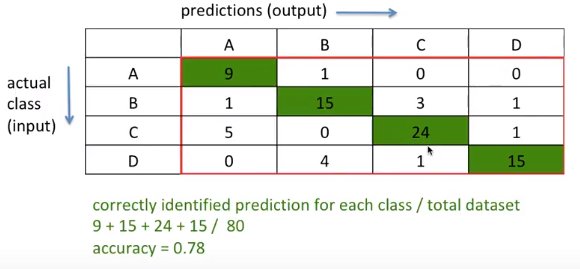
출처: https://nittaku.tistory.com/295

accuracy(정확도): 전체 개수 중 정답을 맞춘 개수
$=\frac{정답 클래스 수}{모든 클래스 수}=\frac{대각선 합}{모든 합}$

### 2. 정밀도(precision)

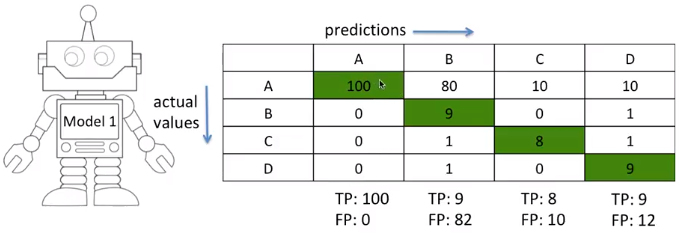
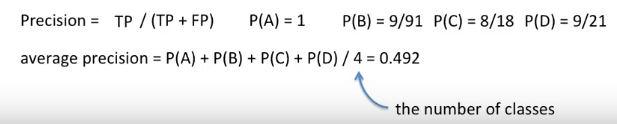

__각 클래스 별 precision(정밀도)__: 해당 클래스로 예측된 개수 중 정답을 맞춘 개수
$=\frac{정답 클래스 수}{예측 클래스 수}=\frac{TP}{TP+FP}$


__전체 precision(정밀도)__: 각 클래스 별 precision의 _평균_


__평균 구하는 방법__: macro(단순 평균), weighted(각 클래스에 속하는 표본의 개수로 가중 평균), accuracy(정확도로 가중 평균)

### 3. 재현율(recall)

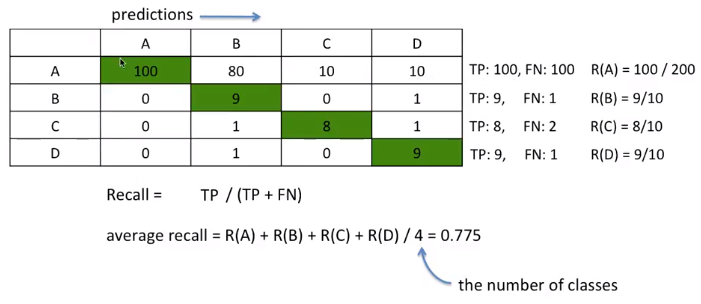

__각 클래스 별 recall(재현율)__: 해당 클래스 개수 중 정답을 맞춘 개수
$=\frac{정답 클래스 수}{실제 클래스 수}=\frac{TP}{TP+FN}$


__전체 recall(재현율)__: 각 클래스 별 recall의 _평균_

### 4. F1 score
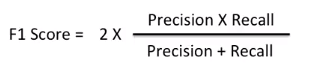

## XGB

In [109]:
from xgboost import XGBClassifier

xgb_clf=XGBClassifier(n_estimators=300, random_state=0, learning_rate=0.1, **opt_parameters)

evals=[(X_test.drop(xgb_drop_cols, axis=1), y_test)]

xgb_clf.fit(X_train.drop(xgb_drop_cols, axis=1), y_train, early_stopping_rounds=100,
            eval_metric="mlogloss",eval_set=evals)

[0]	validation_0-mlogloss:1.27024
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:1.17742
[2]	validation_0-mlogloss:1.09668
[3]	validation_0-mlogloss:1.02651
[4]	validation_0-mlogloss:0.961044
[5]	validation_0-mlogloss:0.906226
[6]	validation_0-mlogloss:0.860344
[7]	validation_0-mlogloss:0.818544
[8]	validation_0-mlogloss:0.782108
[9]	validation_0-mlogloss:0.74892
[10]	validation_0-mlogloss:0.718714
[11]	validation_0-mlogloss:0.694058
[12]	validation_0-mlogloss:0.667944
[13]	validation_0-mlogloss:0.64245
[14]	validation_0-mlogloss:0.621276
[15]	validation_0-mlogloss:0.603024
[16]	validation_0-mlogloss:0.587523
[17]	validation_0-mlogloss:0.573143
[18]	validation_0-mlogloss:0.561858
[19]	validation_0-mlogloss:0.549139
[20]	validation_0-mlogloss:0.537431
[21]	validation_0-mlogloss:0.52847
[22]	validation_0-mlogloss:0.519074
[23]	validation_0-mlogloss:0.509456
[24]	validation_0-mlogloss:0.501612
[25]	validation_0-mlogloss:0.49272
[26]	validat

[224]	validation_0-mlogloss:0.288922
[225]	validation_0-mlogloss:0.287968
[226]	validation_0-mlogloss:0.287957
[227]	validation_0-mlogloss:0.287972
[228]	validation_0-mlogloss:0.287976
[229]	validation_0-mlogloss:0.287968
[230]	validation_0-mlogloss:0.286789
[231]	validation_0-mlogloss:0.286292
[232]	validation_0-mlogloss:0.2863
[233]	validation_0-mlogloss:0.285921
[234]	validation_0-mlogloss:0.285921
[235]	validation_0-mlogloss:0.285917
[236]	validation_0-mlogloss:0.285697
[237]	validation_0-mlogloss:0.285709
[238]	validation_0-mlogloss:0.2857
[239]	validation_0-mlogloss:0.285702
[240]	validation_0-mlogloss:0.285697
[241]	validation_0-mlogloss:0.285694
[242]	validation_0-mlogloss:0.28567
[243]	validation_0-mlogloss:0.285676
[244]	validation_0-mlogloss:0.285681
[245]	validation_0-mlogloss:0.285305
[246]	validation_0-mlogloss:0.285296
[247]	validation_0-mlogloss:0.285299
[248]	validation_0-mlogloss:0.285066
[249]	validation_0-mlogloss:0.284847
[250]	validation_0-mlogloss:0.284844
[251]	

XGBClassifier(colsample_bytree=0.85, eta=0.15, gamma=2.5, max_depth=35,
              min_child_weight=2, n_estimators=300, num_class=4,
              objective='multi:softprob', reg_lambda=0.35, silent=1,
              subsample=0.95)

In [110]:
pred=xgb_clf.predict(X_test.drop(xgb_drop_cols, axis=1))
pred_proba=xgb_clf.predict_proba(X_test.drop(xgb_drop_cols, axis=1))

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [112]:
targetname=["0(extreme poverty)", "1(moderate poverty)", 
            "2(vulnerable households)", "3(non vulnerable households)"]
            
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names=targetname))

[[ 23   0   0   3]
 [  0  59   0   5]
 [  0   0  56  10]
 [  0   0   0 289]]
                              precision    recall  f1-score   support

          0(extreme poverty)       1.00      0.88      0.94        26
         1(moderate poverty)       1.00      0.92      0.96        64
    2(vulnerable households)       1.00      0.85      0.92        66
3(non vulnerable households)       0.94      1.00      0.97       289

                    accuracy                           0.96       445
                   macro avg       0.99      0.91      0.95       445
                weighted avg       0.96      0.96      0.96       445



In [140]:
from sklearn.preprocessing import label_binarize

y_train_bin = label_binarize(y_train, [0, 1, 2, 3])
y_test_bin = label_binarize(y_test, [0, 1, 2, 3])

fpr = [None] * 4 #false positive rates
tpr = [None] * 4 #true positive rates
thr = [None] * 4 #fthresholds 
roc_auc = [None] * 4 #AUC scores

In [149]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

for i in range(4):
    evals=[(X_test.drop(xgb_drop_cols, axis=1), y_test_bin[:,i])]
    model = xgb_clf.fit(X_train.drop(xgb_drop_cols, axis=1),y_train_bin[:,i], 
                        early_stopping_rounds=100, eval_set=evals)
 
    fpr[i], tpr[i], thr[i] = roc_curve(y_test_bin[:,i], model.predict_proba(X_test.drop(xgb_drop_cols, axis=1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

[0]	validation_0-merror:0.044944
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.040449
[2]	validation_0-merror:0.038202
[3]	validation_0-merror:0.038202
[4]	validation_0-merror:0.040449
[5]	validation_0-merror:0.040449
[6]	validation_0-merror:0.040449
[7]	validation_0-merror:0.040449
[8]	validation_0-merror:0.038202
[9]	validation_0-merror:0.038202
[10]	validation_0-merror:0.038202
[11]	validation_0-merror:0.038202
[12]	validation_0-merror:0.035955
[13]	validation_0-merror:0.038202
[14]	validation_0-merror:0.040449
[15]	validation_0-merror:0.040449
[16]	validation_0-merror:0.040449
[17]	validation_0-merror:0.040449
[18]	validation_0-merror:0.042697
[19]	validation_0-merror:0.042697
[20]	validation_0-merror:0.042697
[21]	validation_0-merror:0.040449
[22]	validation_0-merror:0.038202
[23]	validation_0-merror:0.038202
[24]	validation_0-merror:0.040449
[25]	validation_0-merror:0.040449
[26]	validation_0-merror:0.040449
[27]	validation_0-merror

[2]	validation_0-merror:0.078652
[3]	validation_0-merror:0.076404
[4]	validation_0-merror:0.067416
[5]	validation_0-merror:0.074157
[6]	validation_0-merror:0.067416
[7]	validation_0-merror:0.067416
[8]	validation_0-merror:0.062921
[9]	validation_0-merror:0.060674
[10]	validation_0-merror:0.060674
[11]	validation_0-merror:0.062921
[12]	validation_0-merror:0.062921
[13]	validation_0-merror:0.060674
[14]	validation_0-merror:0.062921
[15]	validation_0-merror:0.062921
[16]	validation_0-merror:0.062921
[17]	validation_0-merror:0.060674
[18]	validation_0-merror:0.065169
[19]	validation_0-merror:0.060674
[20]	validation_0-merror:0.058427
[21]	validation_0-merror:0.058427
[22]	validation_0-merror:0.053933
[23]	validation_0-merror:0.05618
[24]	validation_0-merror:0.05618
[25]	validation_0-merror:0.058427
[26]	validation_0-merror:0.05618
[27]	validation_0-merror:0.05618
[28]	validation_0-merror:0.058427
[29]	validation_0-merror:0.058427
[30]	validation_0-merror:0.058427
[31]	validation_0-merror:0

[240]	validation_0-merror:0.024719
[241]	validation_0-merror:0.024719
[242]	validation_0-merror:0.024719
[243]	validation_0-merror:0.024719
[244]	validation_0-merror:0.024719
[245]	validation_0-merror:0.024719
[246]	validation_0-merror:0.024719
[247]	validation_0-merror:0.024719
[248]	validation_0-merror:0.024719
[249]	validation_0-merror:0.024719
[250]	validation_0-merror:0.024719
[251]	validation_0-merror:0.024719
[252]	validation_0-merror:0.024719
[253]	validation_0-merror:0.024719
[254]	validation_0-merror:0.024719
[255]	validation_0-merror:0.024719
[256]	validation_0-merror:0.024719
[257]	validation_0-merror:0.024719
[258]	validation_0-merror:0.024719
[259]	validation_0-merror:0.024719
[260]	validation_0-merror:0.024719
[261]	validation_0-merror:0.024719
[262]	validation_0-merror:0.024719
[263]	validation_0-merror:0.024719
[264]	validation_0-merror:0.024719
[265]	validation_0-merror:0.024719
[266]	validation_0-merror:0.024719
[267]	validation_0-merror:0.024719
[268]	validation_0-m

[177]	validation_0-merror:0.05618
[178]	validation_0-merror:0.05618
[179]	validation_0-merror:0.05618
[180]	validation_0-merror:0.05618
[181]	validation_0-merror:0.05618
[182]	validation_0-merror:0.05618
[183]	validation_0-merror:0.05618
[184]	validation_0-merror:0.05618
[185]	validation_0-merror:0.053933
[186]	validation_0-merror:0.053933
[187]	validation_0-merror:0.053933
[188]	validation_0-merror:0.053933
[189]	validation_0-merror:0.053933
[190]	validation_0-merror:0.053933
[191]	validation_0-merror:0.053933
[192]	validation_0-merror:0.053933
[193]	validation_0-merror:0.053933
[194]	validation_0-merror:0.053933
[195]	validation_0-merror:0.053933
[196]	validation_0-merror:0.053933
[197]	validation_0-merror:0.051685
[198]	validation_0-merror:0.053933
[199]	validation_0-merror:0.053933
[200]	validation_0-merror:0.053933
[201]	validation_0-merror:0.053933
[202]	validation_0-merror:0.053933
[203]	validation_0-merror:0.053933
[204]	validation_0-merror:0.053933
[205]	validation_0-merror:0.

[113]	validation_0-merror:0.038202
[114]	validation_0-merror:0.038202
[115]	validation_0-merror:0.038202
[116]	validation_0-merror:0.038202
[117]	validation_0-merror:0.038202
[118]	validation_0-merror:0.038202
[119]	validation_0-merror:0.038202
[120]	validation_0-merror:0.038202
[121]	validation_0-merror:0.038202
[122]	validation_0-merror:0.038202
[123]	validation_0-merror:0.038202
[124]	validation_0-merror:0.038202
[125]	validation_0-merror:0.038202
[126]	validation_0-merror:0.038202
[127]	validation_0-merror:0.038202
[128]	validation_0-merror:0.038202
[129]	validation_0-merror:0.038202
[130]	validation_0-merror:0.038202
[131]	validation_0-merror:0.038202
[132]	validation_0-merror:0.038202
[133]	validation_0-merror:0.038202
[134]	validation_0-merror:0.038202
[135]	validation_0-merror:0.038202
[136]	validation_0-merror:0.038202
[137]	validation_0-merror:0.038202
[138]	validation_0-merror:0.038202
[139]	validation_0-merror:0.038202
[140]	validation_0-merror:0.038202
[141]	validation_0-m

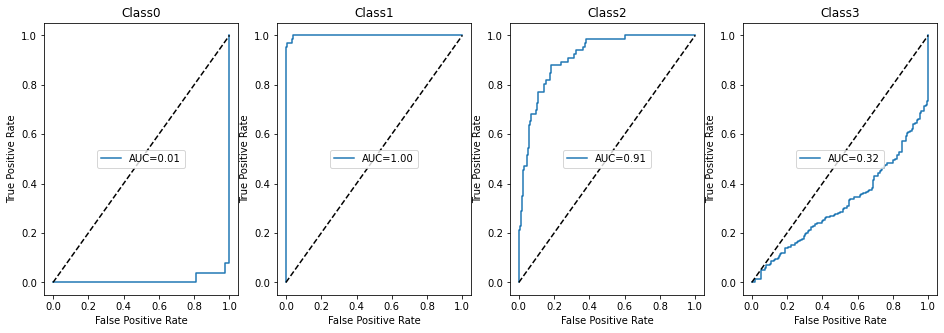

In [152]:
plt.figure(figsize=(16,5))
for i in range(4):
    plt.subplot(141+i)
    plt.plot(fpr[i], tpr[i], label="AUC=%0.2f"%roc_auc[i])
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Class{0}".format(i))
    plt.legend(loc="center")
plt.show()

X축: False Positive Rate=$\frac{False Positive 수}{전체 Negative 수}$  
Y축: True Positive Rate=$\frac{True Positive 수}{전체 Positive 수}$

Class0의 경우는 False Positive가 0이기 때문에..?

In [155]:
print("macro roc_auc_score: ", roc_auc_score(y_test, pred_proba, 
                                             multi_class='ovr', average="macro"))
print("weighted roc_auc_score: ", roc_auc_score(y_test, pred_proba, 
                                                multi_class='ovr', average="weighted"))

macro roc_auc_score:  0.9984542047273914
weighted roc_auc_score:  0.9972681088815976


In [156]:
from sklearn.model_selection import GridSearchCV

n_estimators=[100,300]
learning_rate=[0.05,0.1,0.2]
max_depth=[8,10,20]
    
param_grid = {"n_estimators":n_estimators,
              "learning_rate":learning_rate,
              "max_depth":max_depth}
                    
cv=GridSearchCV(estimator=XGBClassifier(n_estimators=300, random_state=0, learning_rate=0.1, **opt_parameters),
               param_grid=param_grid, verbose=True)

cv.fit(X_train.drop(xgb_drop_cols, axis=1),y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=XGBClassifier(colsample_bytree=0.85, eta=0.15, gamma=2.5,
                                     max_depth=35, min_child_weight=2,
                                     n_estimators=300, num_class=4,
                                     objective='multi:softmax', reg_lambda=0.35,
                                     silent=1, subsample=0.95),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [8, 10, 20], 'n_estimators': [100, 300]},
             verbose=True)

In [168]:
print("GridSearchCV 최적 하이퍼 파라미터:",cv.best_params_)
print("GridSearchCV 최고 정확도",cv.best_score_)
print("GridSearchCV 최적 모형",cv.best_estimator_)

GridSearchCV 최적 하이퍼 파라미터: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 0.544101519395637
GridSearchCV 최적 모형 XGBClassifier(colsample_bytree=0.85, eta=0.15, gamma=2.5, learning_rate=0.05,
              max_depth=8, min_child_weight=2, num_class=4,
              objective='multi:softprob', reg_lambda=0.35, silent=1,
              subsample=0.95)


In [169]:
best_xgb=cv.best_estimator_
best_pred=best_xgb.predict(X_test.drop(xgb_drop_cols, axis=1))
best_proba=best_xgb.predict_proba(X_test.drop(xgb_drop_cols, axis=1))

print(confusion_matrix(y_test, best_pred))
print(classification_report(y_test, best_pred, target_names=targetname))

[[ 23   3   0   0]
 [ 57   7   0   0]
 [ 53  13   0   0]
 [  8 281   0   0]]
                              precision    recall  f1-score   support

          0(extreme poverty)       0.16      0.88      0.28        26
         1(moderate poverty)       0.02      0.11      0.04        64
    2(vulnerable households)       0.00      0.00      0.00        66
3(non vulnerable households)       0.00      0.00      0.00       289

                    accuracy                           0.07       445
                   macro avg       0.05      0.25      0.08       445
                weighted avg       0.01      0.07      0.02       445



In [166]:
from sklearn.preprocessing import label_binarize

y_train_bin = label_binarize(y_train, [0, 1, 2, 3])
y_test_bin = label_binarize(y_test, [0, 1, 2, 3])

fpr = [None] * 4 #false positive rates
tpr = [None] * 4 #true positive rates
thr = [None] * 4 #fthresholds 
roc_auc = [None] * 4 #AUC scores

In [160]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

for i in range(4):
    evals=[(X_test.drop(xgb_drop_cols, axis=1), y_test_bin[:,i])]
    model = best_xgb.fit(X_train.drop(xgb_drop_cols, axis=1),y_train_bin[:,i], 
                        early_stopping_rounds=100, eval_set=evals)
 
    fpr[i], tpr[i], thr[i] = roc_curve(y_test_bin[:,i], model.predict_proba(X_test.drop(xgb_drop_cols, axis=1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

[0]	validation_0-merror:0.044944
Will train until validation_0-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.038202
[2]	validation_0-merror:0.038202
[3]	validation_0-merror:0.035955
[4]	validation_0-merror:0.042697
[5]	validation_0-merror:0.042697
[6]	validation_0-merror:0.044944
[7]	validation_0-merror:0.044944
[8]	validation_0-merror:0.042697
[9]	validation_0-merror:0.040449
[10]	validation_0-merror:0.040449
[11]	validation_0-merror:0.042697
[12]	validation_0-merror:0.040449
[13]	validation_0-merror:0.040449
[14]	validation_0-merror:0.040449
[15]	validation_0-merror:0.040449
[16]	validation_0-merror:0.042697
[17]	validation_0-merror:0.042697
[18]	validation_0-merror:0.042697
[19]	validation_0-merror:0.042697
[20]	validation_0-merror:0.042697
[21]	validation_0-merror:0.042697
[22]	validation_0-merror:0.042697
[23]	validation_0-merror:0.042697
[24]	validation_0-merror:0.042697
[25]	validation_0-merror:0.042697
[26]	validation_0-merror:0.042697
[27]	validation_0-merror

[37]	validation_0-merror:0.14382
[38]	validation_0-merror:0.14382
[39]	validation_0-merror:0.14382
[40]	validation_0-merror:0.14382
[41]	validation_0-merror:0.14382
[42]	validation_0-merror:0.14382
[43]	validation_0-merror:0.14382
[44]	validation_0-merror:0.14382
[45]	validation_0-merror:0.14382
[46]	validation_0-merror:0.141573
[47]	validation_0-merror:0.141573
[48]	validation_0-merror:0.141573
[49]	validation_0-merror:0.141573
[50]	validation_0-merror:0.141573
[51]	validation_0-merror:0.141573
[52]	validation_0-merror:0.141573
[53]	validation_0-merror:0.141573
[54]	validation_0-merror:0.141573
[55]	validation_0-merror:0.141573
[56]	validation_0-merror:0.141573
[57]	validation_0-merror:0.141573
[58]	validation_0-merror:0.141573
[59]	validation_0-merror:0.141573
[60]	validation_0-merror:0.141573
[61]	validation_0-merror:0.141573
[62]	validation_0-merror:0.141573
[63]	validation_0-merror:0.141573
[64]	validation_0-merror:0.141573
[65]	validation_0-merror:0.141573
[66]	validation_0-merro

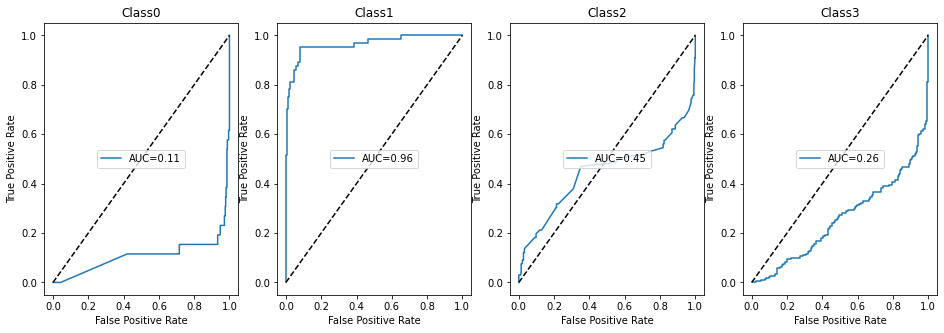

In [161]:
plt.figure(figsize=(16,5))
for i in range(4):
    plt.subplot(141+i)
    plt.plot(fpr[i], tpr[i], label="AUC=%0.2f"%roc_auc[i])
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Class{0}".format(i))
    plt.legend(loc="center")
plt.show()

In [164]:
print("macro roc_auc_score: ", roc_auc_score(y_test, best_proba, 
                                             multi_class='ovr', average="macro"))
print("weighted roc_auc_score: ", roc_auc_score(y_test, best_proba, 
                                                multi_class='ovr', average="weighted"))

macro roc_auc_score:  0.48756052973614006
weighted roc_auc_score:  0.34229573921430273


In [89]:
ranked_features = feature_importance(best_xgb, X_train.drop(xgb_drop_cols, axis=1))

Feature ranking:
1. feature 60 (0.035064)-agg18_escolari_MEAN
2. feature 5 (0.030743)-v18q1
3. feature 42 (0.029556)-fe_children_fraction
4. feature 82 (0.023030)-agg18_parentesco10_MEAN
5. feature 22 (0.016657)-dependency
6. feature 59 (0.016397)-agg18_escolari_MAX
7. feature 95 (0.016015)-eviv_LE
8. feature 81 (0.015048)-agg18_parentesco9_MEAN
9. feature 18 (0.013844)-hogar_nin
10. feature 52 (0.013692)-fe_tablet_adult_density
11. feature 1 (0.013664)-hacdor
12. feature 78 (0.013588)-agg18_parentesco6_MEAN
13. feature 50 (0.013401)-fe_tablet_density
14. feature 49 (0.013032)-fe_mobile_density
15. feature 79 (0.012921)-agg18_parentesco7_MEAN
16. feature 47 (0.011575)-fe_rent_per_person
17. feature 77 (0.011360)-agg18_parentesco5_MEAN
18. feature 19 (0.011314)-hogar_adul
19. feature 16 (0.011243)-dis
20. feature 0 (0.011201)-v2a1
21. feature 48 (0.011026)-fe_rent_per_room
22. feature 7 (0.010899)-r4h2
23. feature 100 (0.010744)-geo_age
24. feature 96 (0.010569)-estadocivil_LE
25. featu

In [190]:
pd.Series(best_xgb.feature_importances_, X_train.drop(xgb_drop_cols, axis=1).columns).sort_values(ascending=False)[:10]


agg18_escolari_MAX      0.048116
agg18_escolari_MEAN     0.035500
dependency              0.022944
SQBdependency           0.019587
fe_children_fraction    0.018193
fe_mobile_density       0.017665
eviv_LE                 0.015436
rent_to_hhsize          0.012168
geo_pared_LE_2          0.012032
v18q1                   0.011919
dtype: float32

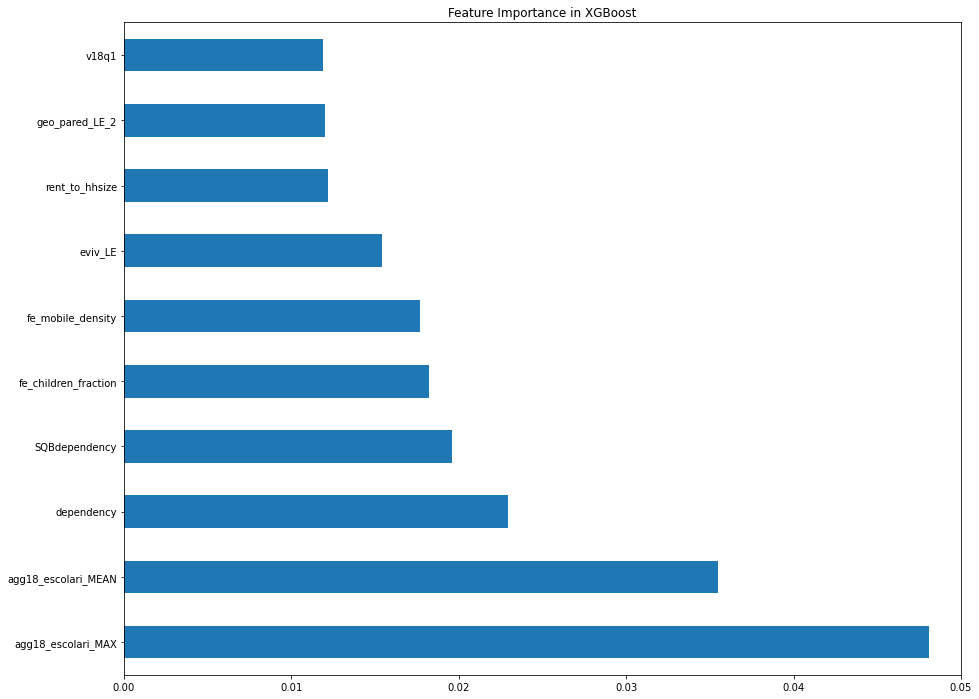

In [194]:
f, ax = plt.subplots(1,1,figsize=(15,12))
pd.Series(best_xgb.feature_importances_, X_train.drop(xgb_drop_cols, axis=1).columns).sort_values(ascending=False)[:10].plot.barh()
plt.xlim(0,0.05)
ax.set_title('Feature Importance in XGBoost')
plt.show()